<a href="https://colab.research.google.com/github/jmaritar/neural-network/blob/master/src/06_flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Flores

Queremos clasificar flores en tres categorías diferentes: rosa, margarita y girasol, basándonos en el tamaño de los pétalos y los sépalos de la flor. Para ello, necesitamos utilizar una red neuronal con múltiples neuronas de entrada para medir la longitud y el ancho de los pétalos y sépalos. Además, podríamos incluir otras variables como el color de la flor, la forma de los pétalos y sépalos, y cualquier otra característica que pueda ser útil para distinguir entre las diferentes categorías de flores. Cuantas más neuronas de entrada utilicemos y más características consideremos, más precisa será nuestra clasificación de las flores.

## Capas de la Red Neuronal

1. **Capa de entrada:** Un vector de 6 elementos representando las variables de entrada.
    - X1 = Longitud de Pétalos
    - X2 = Ancho de Pétalos
    - X3 = Longitud de Sépalos
    - X4 = Ancho de Sépalos
    - X5 = Color de la Flor
    - X6 = Forma de los Pétalos y Sépalos

2. **Capa oculta:** 4 neuronas representando características de las flores.
    - Y1 = Característica 1
    - Y2 = Característica 2
    - Y3 = Característica 3
    - Y4 = Característica 4

3. **Capa de salida:** 3 neuronas representando la clasificación de las flores.
    - S1 = Rosa
    - S2 = Margarita
    - S3 = Girasol

## Conexiones de la Red Neuronal

Las conexiones entre las capas se representan mediante matrices de pesos.

### De la capa de entrada a la capa oculta

$$
\begin{bmatrix}
0.2 & 0.1 & 0.3 & 0.4 \\
0.3 & 0.2 & 0.4 & 0.5 \\
0.1 & 0.3 & 0.2 & 0.1 \\
0.4 & 0.4 & 0.3 & 0.2 \\
0.5 & 0.1 & 0.4 & 0.3 \\
0.2 & 0.2 & 0.1 & 0.4 \\
\end{bmatrix}
$$

### De la capa oculta a la capa de salida

$$
\begin{bmatrix}
0.3 & 0.2 & 0.1 \\
0.2 & 0.3 & 0.4 \\
0.1 & 0.4 & 0.5 \\
0.4 & 0.1 & 0.3 \\
\end{bmatrix}
$$

## Calculando los Pesos

Para determinar la clasificación de una flor, necesitamos:
- X1 = 5 cm de Longitud de Pétalos
- X2 = 1.5 cm de Ancho de Pétalos
- X3 = 3 cm de Longitud de Sépalos
- X4 = 0.5 cm de Ancho de Sépalos
- X5 = 1 (Color de la Flor)
- X6 = 1 (Forma de los Pétalos y Sépalos)

### Pesos Calculados

Para la clasificación:
- X1 * 0.2 * 5 = 1
- X2 * 0.3 * 1.5 = 0.45
- X3 * 0.1 * 3 = 0.3
- X4 * 0.4 * 0.5 = 0.2
- X5 * 0.5 * 1 = 0.5
- X6 * 0.2 * 1 = 0.2

Total = 1 + 0.45 + 0.3 + 0.2 + 0.5 + 0.2 = 2.65

FloatSlider(value=5.0, description='Long. Pétalo', max=10.0)

FloatSlider(value=1.5, description='Ancho Pétalo', max=5.0)

FloatSlider(value=3.0, description='Long. Sépalos', max=10.0)

FloatSlider(value=0.5, description='Ancho Sépalos', max=5.0)

FloatSlider(value=1.0, description='Color Flor', max=10.0)

FloatSlider(value=1.0, description='Forma Pétalo/Sépalo', max=10.0)

Button(description='Clasificar Flor', style=ButtonStyle())

Valores: Longitud de Pétalos=5.0, Ancho de Pétalos=1.5, Longitud de Sépalos=3.0, Ancho de Sépalos=0.5, Color de la Flor=1.0, Forma de los Pétalos y Sépalos=1.0
Valor entrada=[2.65 2.2  3.35 3.85], Resultado=[3.11  2.915 3.975]
El tipo de flor es: Girasol
Valores: Longitud de Pétalos=5.0, Ancho de Pétalos=1.5, Longitud de Sépalos=3.0, Ancho de Sépalos=0.5, Color de la Flor=1.0, Forma de los Pétalos y Sépalos=1.0
Valor entrada=[2.65 2.2  3.35 3.85], Resultado=[3.11  2.915 3.975]


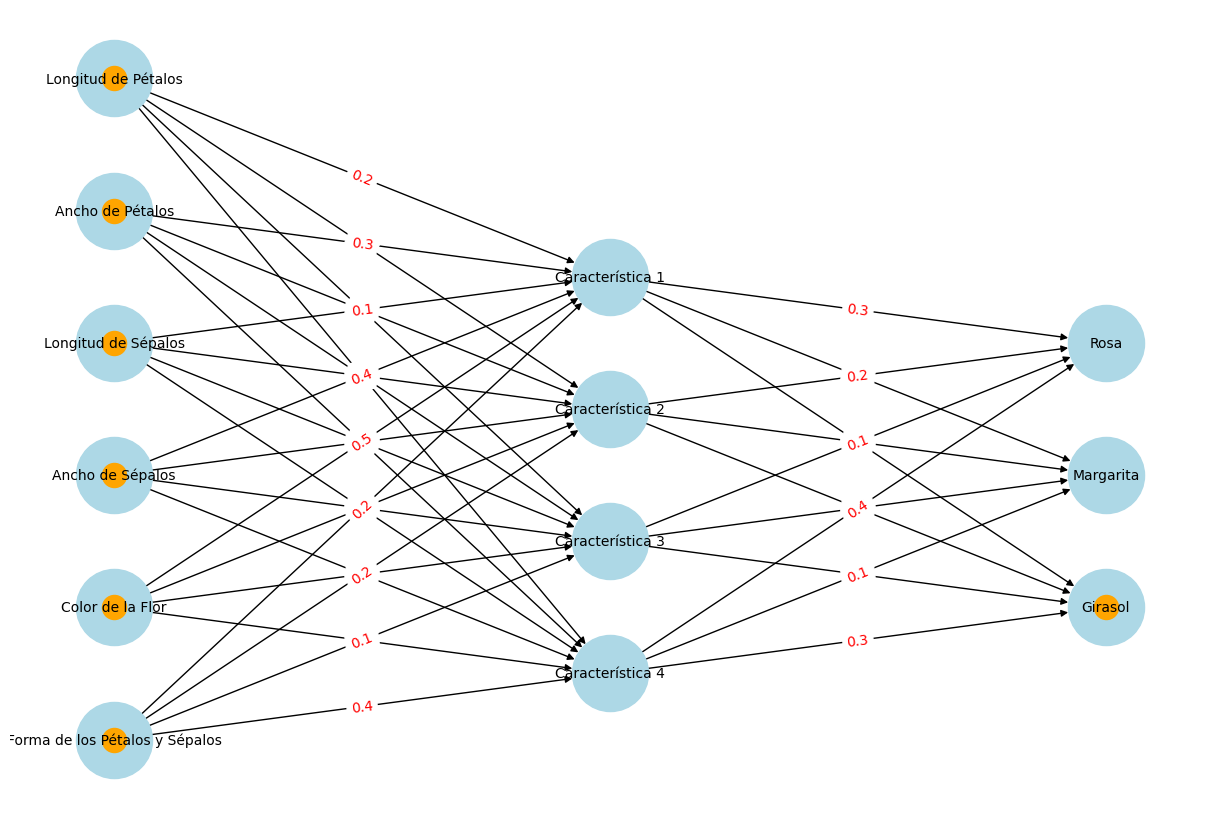

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import ipywidgets as widgets

# Pesos de los ingredientes
pesos_entrada = np.array([[0.2, 0.1, 0.3, 0.4],
                          [0.3, 0.2, 0.4, 0.5],
                          [0.1, 0.3, 0.2, 0.1],
                          [0.4, 0.4, 0.3, 0.2],
                          [0.5, 0.1, 0.4, 0.3],
                          [0.2, 0.2, 0.1, 0.4]])
pesos_ocultos = np.array([[0.3, 0.2, 0.1],
                          [0.2, 0.3, 0.4],
                          [0.1, 0.4, 0.5],
                          [0.4, 0.1, 0.3]])

# Función para calcular el resultado de la red neuronal
def calcular_resultado(ingredientes):
    x = np.array([ingredientes['longitud_petalo'], ingredientes['ancho_petalo'], ingredientes['longitud_sepalo'], ingredientes['ancho_sepalo'], ingredientes['color_flor'], ingredientes['forma_petalo_sepalo']])
    valor_entrada = np.dot(x, pesos_entrada)
    resultado = np.dot(valor_entrada, pesos_ocultos)
    print(f"Valores: Longitud de Pétalos={ingredientes['longitud_petalo']}, Ancho de Pétalos={ingredientes['ancho_petalo']}, Longitud de Sépalos={ingredientes['longitud_sepalo']}, Ancho de Sépalos={ingredientes['ancho_sepalo']}, Color de la Flor={ingredientes['color_flor']}, Forma de los Pétalos y Sépalos={ingredientes['forma_petalo_sepalo']}")
    print(f"Valor entrada={valor_entrada}, Resultado={resultado}")
    return resultado

# Función para determinar el tipo de flor
def tipo_de_flor(resultado):
    if np.argmax(resultado) == 0:
        return "Rosa"
    elif np.argmax(resultado) == 1:
        return "Margarita"
    else:
        return "Girasol"

# Función para visualizar la red neuronal
def visualizar_red(ingredientes):
    G = nx.DiGraph()
    edges = [
        ('Longitud de Pétalos', 'Característica 1', pesos_entrada[0][0]), ('Longitud de Pétalos', 'Característica 2', pesos_entrada[0][1]), ('Longitud de Pétalos', 'Característica 3', pesos_entrada[0][2]), ('Longitud de Pétalos', 'Característica 4', pesos_entrada[0][3]),
        ('Ancho de Pétalos', 'Característica 1', pesos_entrada[1][0]), ('Ancho de Pétalos', 'Característica 2', pesos_entrada[1][1]), ('Ancho de Pétalos', 'Característica 3', pesos_entrada[1][2]), ('Ancho de Pétalos', 'Característica 4', pesos_entrada[1][3]),
        ('Longitud de Sépalos', 'Característica 1', pesos_entrada[2][0]), ('Longitud de Sépalos', 'Característica 2', pesos_entrada[2][1]), ('Longitud de Sépalos', 'Característica 3', pesos_entrada[2][2]), ('Longitud de Sépalos', 'Característica 4', pesos_entrada[2][3]),
        ('Ancho de Sépalos', 'Característica 1', pesos_entrada[3][0]), ('Ancho de Sépalos', 'Característica 2', pesos_entrada[3][1]), ('Ancho de Sépalos', 'Característica 3', pesos_entrada[3][2]), ('Ancho de Sépalos', 'Característica 4', pesos_entrada[3][3]),
        ('Color de la Flor', 'Característica 1', pesos_entrada[4][0]), ('Color de la Flor', 'Característica 2', pesos_entrada[4][1]), ('Color de la Flor', 'Característica 3', pesos_entrada[4][2]), ('Color de la Flor', 'Característica 4', pesos_entrada[4][3]),
        ('Forma de los Pétalos y Sépalos', 'Característica 1', pesos_entrada[5][0]), ('Forma de los Pétalos y Sépalos', 'Característica 2', pesos_entrada[5][1]), ('Forma de los Pétalos y Sépalos', 'Característica 3', pesos_entrada[5][2]), ('Forma de los Pétalos y Sépalos', 'Característica 4', pesos_entrada[5][3]),
        ('Característica 1', 'Rosa', pesos_ocultos[0][0]), ('Característica 1', 'Margarita', pesos_ocultos[0][1]), ('Característica 1', 'Girasol', pesos_ocultos[0][2]),
        ('Característica 2', 'Rosa', pesos_ocultos[1][0]), ('Característica 2', 'Margarita', pesos_ocultos[1][1]), ('Característica 2', 'Girasol', pesos_ocultos[1][2]),
        ('Característica 3', 'Rosa', pesos_ocultos[2][0]), ('Característica 3', 'Margarita', pesos_ocultos[2][1]), ('Característica 3', 'Girasol', pesos_ocultos[2][2]),
        ('Característica 4', 'Rosa', pesos_ocultos[3][0]), ('Característica 4', 'Margarita', pesos_ocultos[3][1]), ('Característica 4', 'Girasol', pesos_ocultos[3][2])
    ]
    G.add_weighted_edges_from(edges)
    pos = {
        'Longitud de Pétalos': (0, 5), 'Ancho de Pétalos': (0, 4), 'Longitud de Sépalos': (0, 3), 'Ancho de Sépalos': (0, 2), 'Color de la Flor': (0, 1), 'Forma de los Pétalos y Sépalos': (0, 0),
        'Característica 1': (1, 3.5), 'Característica 2': (1, 2.5), 'Característica 3': (1, 1.5), 'Característica 4': (1, 0.5),
        'Rosa': (2, 3), 'Margarita': (2, 2), 'Girasol': (2, 1)
    }

    # Determinar los nodos activados
    activaciones = ['Longitud de Pétalos' if ingredientes['longitud_petalo'] > 0 else None,
                    'Ancho de Pétalos' if ingredientes['ancho_petalo'] > 0 else None,
                    'Longitud de Sépalos' if ingredientes['longitud_sepalo'] > 0 else None,
                    'Ancho de Sépalos' if ingredientes['ancho_sepalo'] > 0 else None,
                    'Color de la Flor' if ingredientes['color_flor'] > 0 else None,
                    'Forma de los Pétalos y Sépalos' if ingredientes['forma_petalo_sepalo'] > 0 else None]
    activaciones = list(filter(None, activaciones))

    resultado = calcular_resultado(ingredientes)
    tipo_flor = tipo_de_flor(resultado)
    if tipo_flor:
        activaciones.append(tipo_flor)

    # Dibujar la red neuronal
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrows=True)
    edge_labels = {(u, v): f'{d["weight"]:.1f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Resaltar nodos y conexiones activadas
    activated_edges = [(u, v) for u, v, d in G.edges(data=True) if u in activaciones and v in activaciones]
    nx.draw_networkx_edges(G, pos, edgelist=activated_edges, edge_color='orange', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=activaciones, node_color='orange')

    plt.show()

# Interfaz de usuario para cambiar los valores
longitud_petalo_slider = widgets.FloatSlider(min=0, max=10, step=0.1, description='Long. Pétalo', value=5)
ancho_petalo_slider = widgets.FloatSlider(min=0, max=5, step=0.1, description='Ancho Pétalo', value=1.5)
longitud_sepalo_slider = widgets.FloatSlider(min=0, max=10, step=0.1, description='Long. Sépalos', value=3)
ancho_sepalo_slider = widgets.FloatSlider(min=0, max=5, step=0.1, description='Ancho Sépalos', value=0.5)
color_flor_slider = widgets.FloatSlider(min=0, max=10, step=0.1, description='Color Flor', value=1)
forma_petalo_sepalo_slider = widgets.FloatSlider(min=0, max=10, step=0.1, description='Forma Pétalo/Sépalo', value=1)
button = widgets.Button(description='Clasificar Flor')

# Función de manejo del botón
def on_button_clicked(b):
    clear_output(wait=True)
    display(longitud_petalo_slider, ancho_petalo_slider, longitud_sepalo_slider, ancho_sepalo_slider, color_flor_slider, forma_petalo_sepalo_slider, button)
    ingredientes = {
        "longitud_petalo": longitud_petalo_slider.value,
        "ancho_petalo": ancho_petalo_slider.value,
        "longitud_sepalo": longitud_sepalo_slider.value,
        "ancho_sepalo": ancho_sepalo_slider.value,
        "color_flor": color_flor_slider.value,
        "forma_petalo_sepalo": forma_petalo_sepalo_slider.value
    }
    resultado = calcular_resultado(ingredientes)
    tipo_flor = tipo_de_flor(resultado)
    print(f"El tipo de flor es: {tipo_flor}")
    visualizar_red(ingredientes)

button.on_click(on_button_clicked)

# Mostrar la interfaz
display(longitud_petalo_slider, ancho_petalo_slider, longitud_sepalo_slider, ancho_sepalo_slider, color_flor_slider, forma_petalo_sepalo_slider, button)
